In [13]:
import pandas as pd
import numpy as np

In [14]:
footprinter = pd.read_parquet('host.parquet').groupby('timestamp').sum()
footprinter

,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,uptime,downtime,boot_time
timestamp,,,,,,,,,,,,,,,,,,,,
300000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,114,0,0,221600.0,2306.100005,2306.100005,2.882625,14148160,1315451840,0,0,55832.393751,1.675264e+07,83100000,0,0
600000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,114,0,0,221600.0,2253.380008,2253.380008,2.816725,13824612,1315775388,0,0,55822.508752,1.674961e+07,83100000,0,0
900000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2266.420002,2266.420002,2.833025,13722282,1315877718,0,0,55824.953750,1.674865e+07,83100000,0,0
1200000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2314.159985,2314.159985,2.892700,13808538,1315791462,0,0,55833.904997,1.674946e+07,83100000,0,0
1500000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2313.830009,2313.830009,2.892288,13913946,1315686054,0,0,55833.843127,1.675044e+07,83100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603600000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,99,0,0,221600.0,3385.829994,3385.829994,4.232287,20330133,1309269867,0,0,56034.843124,1.681059e+07,83100000,0,0
603900000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,98,0,0,221600.0,3408.329982,3408.329982,4.260412,20400207,1309199793,0,0,56039.061871,1.681125e+07,83100000,0,0
604200000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,99,0,0,221600.0,3390.419973,3390.419973,4.238025,20384879,1309215121,0,0,56035.703745,1.681111e+07,83100000,0,0


In [4]:
validation = pd.read_parquet('validation.parquet')[['timestamp', 'host', 'power_draw']]
validation

,timestamp,host,power_draw
0,30000,r27n19r27n13r27n14r27n24r25n16r25n32r27n16r27n...,22008.0
1,60000,r27n19r27n13r27n14r27n24r25n16r25n32r27n16r27n...,21260.0
2,90000,r27n19r27n13r27n14r27n24r25n16r25n32r27n16r27n...,21260.0
3,120000,r27n19r27n13r27n14r27n24r25n16r25n32r27n16r27n...,21260.0
4,150000,r27n19r27n13r27n14r27n24r25n16r25n32r27n16r27n...,21260.0
...,...,...,...
20154,604650000,r27n14r27n24r27n25r25n32r27n20r27n21r27n5r27n1...,18448.0
20155,604680000,r27n14r27n24r27n25r25n32r27n20r27n21r27n5r27n1...,18448.0
20156,604710000,r27n14r27n24r27n25r25n32r27n20r27n21r27n5r27n1...,18448.0
20157,604740000,r27n14r27n24r27n25r25n32r27n20r27n21r27n5r27n1...,18448.0


In [7]:
group_key = np.arange(len(validation)) // 10

# Aggregate the data by the new group key
aggregated_data = validation.groupby(group_key).agg({
    'timestamp': 'max',  # Maximum timestamp in each group
    'power_draw': 'sum'  # Sum of power_draw in each group
})
aggregated_data

,timestamp,power_draw
0,300000,211892.0
1,600000,209980.0
2,900000,209364.0
3,1200000,209720.0
4,1500000,209272.0
...,...,...
2011,603600000,178760.0
2012,603900000,178960.0
2013,604200000,178860.0
2014,604500000,181344.0


In [9]:
aggregated_data.to_parquet('host.parquet')
aggregated_data.to_parquet('validation-short.parquet')

<Axes: xlabel='timestamp'>

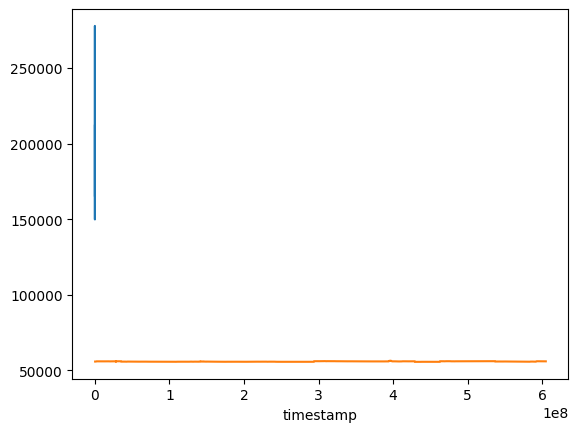

In [12]:
aggregated_data["power_draw"].plot()
footprinter["power_draw"].plot()

In [15]:
validation_short = pd.read_parquet('validation-short.parquet')
validation_short

,timestamp,power_draw
0,300000,211892.0
1,600000,209980.0
2,900000,209364.0
3,1200000,209720.0
4,1500000,209272.0
...,...,...
2011,603600000,178760.0
2012,603900000,178960.0
2013,604200000,178860.0
2014,604500000,181344.0


In [17]:
footprinter

,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,uptime,downtime,boot_time
timestamp,,,,,,,,,,,,,,,,,,,,
300000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,114,0,0,221600.0,2306.100005,2306.100005,2.882625,14148160,1315451840,0,0,55832.393751,1.675264e+07,83100000,0,0
600000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,114,0,0,221600.0,2253.380008,2253.380008,2.816725,13824612,1315775388,0,0,55822.508752,1.674961e+07,83100000,0,0
900000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2266.420002,2266.420002,2.833025,13722282,1315877718,0,0,55824.953750,1.674865e+07,83100000,0,0
1200000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2314.159985,2314.159985,2.892700,13808538,1315791462,0,0,55833.904997,1.674946e+07,83100000,0,0
1500000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,113,0,0,221600.0,2313.830009,2313.830009,2.892288,13913946,1315686054,0,0,55833.843127,1.675044e+07,83100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603600000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,99,0,0,221600.0,3385.829994,3385.829994,4.232287,20330133,1309269867,0,0,56034.843124,1.681059e+07,83100000,0,0
603900000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,98,0,0,221600.0,3408.329982,3408.329982,4.260412,20400207,1309199793,0,0,56039.061871,1.681125e+07,83100000,0,0
604200000,30260345-dd9e-0ec1-0000-000000000038caa82f9b-b...,4432,27700000,0,99,0,0,221600.0,3390.419973,3390.419973,4.238025,20384879,1309215121,0,0,56035.703745,1.681111e+07,83100000,0,0
